In [1]:
from IPython.core.debugger import set_trace
import numpy as np
import pprint
import sys
sys.path.append("../../envs_info/")
from lib.envs.gridworld import GridworldEnv

In [2]:
pp = pprint.PrettyPrinter(indent=2)
env = GridworldEnv()

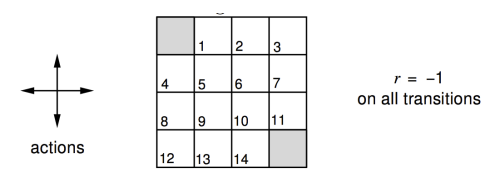

In [7]:
env.P

{0: {0: [(1.0, 0, 0.0, True)],
  1: [(1.0, 0, 0.0, True)],
  2: [(1.0, 0, 0.0, True)],
  3: [(1.0, 0, 0.0, True)]},
 1: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 2, -1.0, False)],
  2: [(1.0, 5, -1.0, False)],
  3: [(1.0, 0, -1.0, True)]},
 2: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 6, -1.0, False)],
  3: [(1.0, 1, -1.0, False)]},
 3: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 7, -1.0, False)],
  3: [(1.0, 2, -1.0, False)]},
 4: {0: [(1.0, 0, -1.0, True)],
  1: [(1.0, 5, -1.0, False)],
  2: [(1.0, 8, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 5: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 6, -1.0, False)],
  2: [(1.0, 9, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 6: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 10, -1.0, False)],
  3: [(1.0, 5, -1.0, False)]},
 7: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 11, -1.0, False)],
  3: [(1.0, 6, -1.0, False)]},
 8: {0: [(1.0, 4

In [3]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a random (all 0) value function
    V = np.zeros(env.nS)
    while True:
        delta = 0
        # For each state, perform a "full backup"
        for s in range(env.nS):
            v = 0
            # Look at the possible next actions
            for a, action_prob in enumerate(policy[s]):
                # For each action, look at the possible next states...
                print("env.P[s][a]: ", env.P[s][a])
                for prob, next_state, reward, done in env.P[s][a]:
                    # Calculate the expected value. Ref: Sutton book eq. 4.6.
                    v += action_prob * prob * (reward + discount_factor * V[next_state])
            # How much our value function changed (across any states)
            delta = max(delta, np.abs(v - V[s]))
            V[s] = v
        # Stop evaluating once our value function change is below a threshold
        if delta < theta:
            break
    return np.array(V)

In [4]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
print(random_policy.reshape(env.nA, env.nA, env.nA))

v = policy_eval(random_policy, env)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 0, -1.0, True)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][

env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 11, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 11, -1.0, False)]
env.P[s][a]:  [(1.0, 14, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P

env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 0, -1.0, True)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 11, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s]

env.P[s][a]:  [(1.0, 15, 0.0, True)]
env.P[s][a]:  [(1.0, 15, 0.0, True)]
env.P[s][a]:  [(1.0, 15, 0.0, True)]
env.P[s][a]:  [(1.0, 15, 0.0, True)]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 0, -1.0, True)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 0, -1.0, True)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1

env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 0, -1.0, True)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 11, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s]

env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 11, -1.0, False)]
env.P[s][a]:  [(1.0, 14, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 11, -1.0, False)]
env.P[s][a]:  [(1.0, 15, -1.0, True)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 14, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 15, -1.0, True)

env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 0, 0.0, True)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 0, -1.0, True)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 3, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 0, -1.0, True)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 1, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 4, -1.0, False)]
env.P[s][a]:  [(1.0, 2, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1

env.P[s][a]:  [(1.0, 5, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 6, -1.0, False)]
env.P[s][a]:  [(1.0, 11, -1.0, False)]
env.P[s][a]:  [(1.0, 14, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 7, -1.0, False)]
env.P[s][a]:  [(1.0, 11, -1.0, False)]
env.P[s][a]:  [(1.0, 15, -1.0, True)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 8, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 9, -1.0, False)]
env.P[s][a]:  [(1.0, 14, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 12, -1.0, False)]
env.P[s][a]:  [(1.0, 10, -1.0, False)]
env.P[s][a]:  [(1.0, 15, -1.0, True)]
env.P[s][a]:  [(1.0, 14, -1.0, False)]
env.P[s][a]:  [(1.0, 13, -1.0, False)]
env.P[s][a]:  [(1.0, 15, 0.0, True)]
env.P[s][a]:  [(1.0, 15, 0.0, True)]

In [5]:
print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")

Value Function:
[  0.         -13.99993529 -19.99990698 -21.99989761 -13.99993529
 -17.9999206  -19.99991379 -19.99991477 -19.99990698 -19.99991379
 -17.99992725 -13.99994569 -21.99989761 -19.99991477 -13.99994569
   0.        ]

Reshaped Grid Value Function:
[[  0.         -13.99993529 -19.99990698 -21.99989761]
 [-13.99993529 -17.9999206  -19.99991379 -19.99991477]
 [-19.99990698 -19.99991379 -17.99992725 -13.99994569]
 [-21.99989761 -19.99991477 -13.99994569   0.        ]]



In [6]:
# Test: Make sure the evaluated policy is what we expected
expected_v = np.array([0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)